# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [2]:
import numpy as np

In [11]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_log = []

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        x_log.append(x)
        E = (I - (K @ H)) @ E

        print(f"x= \n{x}")
        print(f"E= \n{E}")

    return k_log, x_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

Let $\hat{x}_t$ = ($ x $, $ y $, $ V_x $, $ V_y $)

In [13]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [14]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.eye(4)
E[0][0] = 0.
E[1][1] = 0.
E[2][2] = 1000
E[3][3] = 1000

# next state function: 4D
F = np.eye(4)
F[0][2] = dt
F[1][3] = dt

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.eye(4)[0:2]

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = 0.1 * np.eye(2)

# 4D identity matrix
I = np.eye(4)

print(f"E:\n{E}")
print(f"F:\n{F}")
print(f"H:\n{H}")
print(f"R:\n{R}")
print(f"I:\n{I}")

E:
[[   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]]
F:
[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
H:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]
R:
[[0.1 0. ]
 [0.  0.1]]
I:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## First experiment

In [15]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [16]:
k_log, x_log = kalman_filter(x, E)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  5.99600798]
 [  8.00838323]
 [  9.98003992]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  6.99785867]
 [  6.00449679]
 [  9.99286224]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  7.99866711]
 [  4.00279907]
 [  9.99666778]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [26]:
import matplotlib.pyplot as plt

In [42]:
k_log[3]

array([[0.53315561, 0.        ],
       [0.        , 0.53315561],
       [1.33288904, 0.        ],
       [0.        , 1.33288904]])

In [40]:
# YOUR CODE HERE
def plot_x_log(x_log):
    time = [dt*(i+1) for i in range(len(x_log))]
    x = [x[0].item() for x in x_log]
    y = [x[1].item() for x in x_log]
    vx = [x[2].item() for x in x_log]
    vy = [x[3].item() for x in x_log]

    plt.figure(figsize=(20, 12))
    plt.subplot(221)
    plt.plot(time, x, label="x")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(222)
    plt.plot(time, y, label="y")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(223)
    plt.plot(time, vx, label="vx")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(224)
    plt.plot(time, vy, label="vy")
    plt.xlabel("time")
    plt.legend()

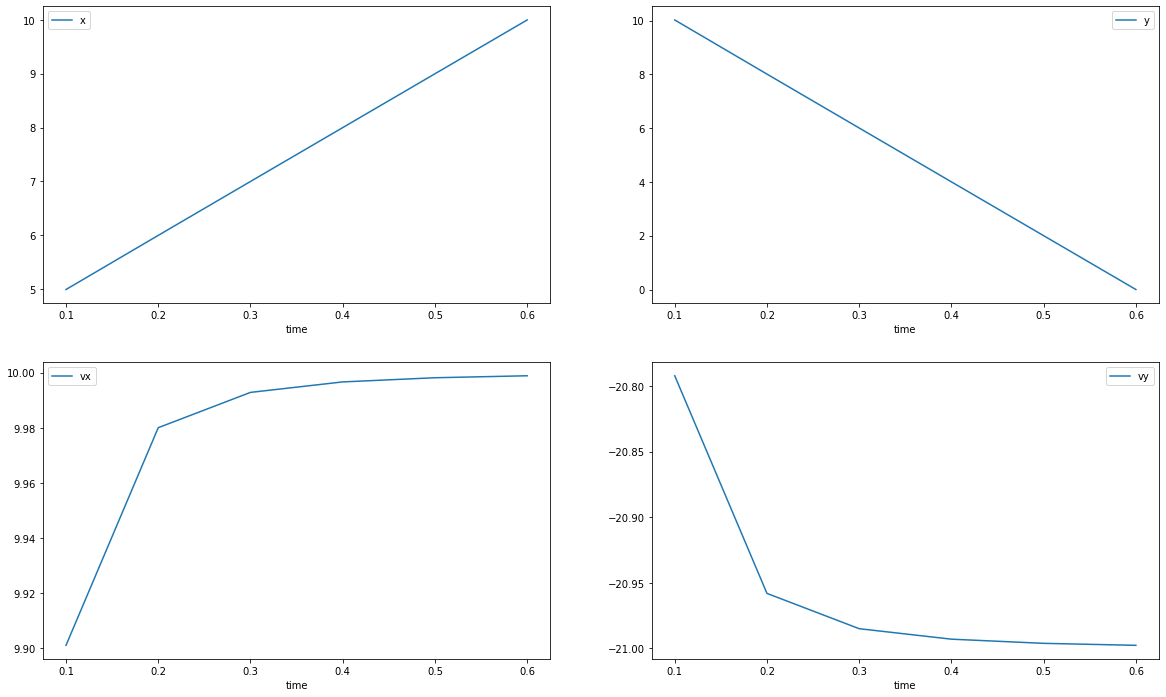

In [41]:
plot_x_log(x_log)

Visualize the components of the $ K $ matrix below

In [51]:
# YOUR CODE HERE
def plot_k_log(k_log):
    time = [dt*(i+1) for i in range(len(k_log))]
    k00 = [K[0][0] for K in k_log]
    k01 = [K[0][1] for K in k_log]
    k10 = [K[1][0] for K in k_log]
    k11 = [K[1][1] for K in k_log]
    k20 = [K[2][0] for K in k_log]
    k21 = [K[2][1] for K in k_log]
    k30 = [K[3][0] for K in k_log]
    k31 = [K[3][1] for K in k_log]

    plt.figure(figsize=(20, 16))
    plt.subplot(421)
    plt.plot(time, k00, label="k00")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(422)
    plt.plot(time, k01, label="k01")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(423)
    plt.plot(time, k10, label="k10")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(424)
    plt.plot(time, k11, label="k11")
    plt.xlabel("time")
    plt.legend()
    
    plt.subplot(425)
    plt.plot(time, k20, label="k20")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(426)
    plt.plot(time, k21, label="k21")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(427)
    plt.plot(time, k30, label="k30")
    plt.xlabel("time")
    plt.legend()

    plt.subplot(428)
    plt.plot(time, k31, label="k31")
    plt.xlabel("time")
    plt.legend()

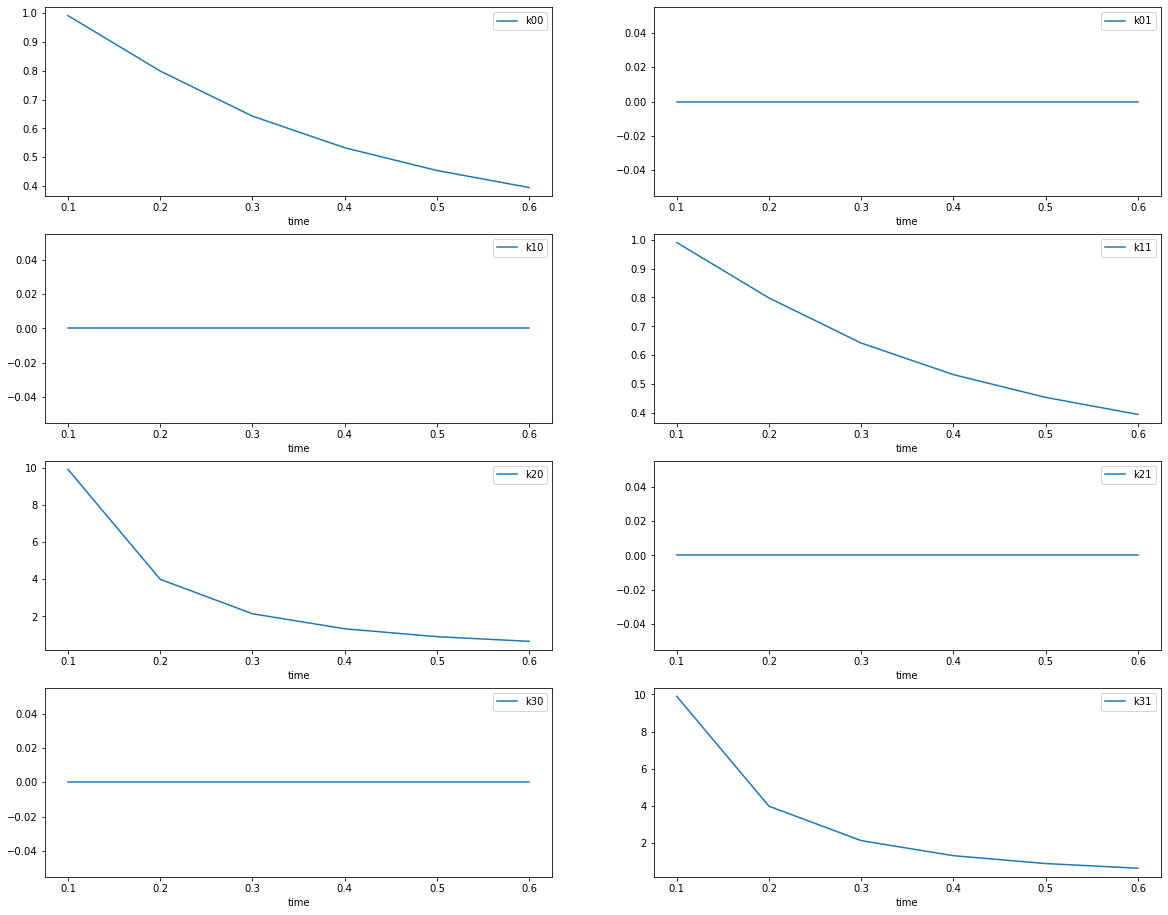

In [52]:
plot_k_log(k_log)

## Second experiment

In [56]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [57]:
k_log, x_log = kalman_filter(x, E)

x= 
[[  0.95049505]
 [  4.04059406]
 [ 49.5049505 ]
 [-40.59405941]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[ 5.98003992e+00]
 [ 1.63672655e-02]
 [ 4.99001996e+01]
 [-4.09181637e+01]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[ 10.98929336]
 [ -3.99122056]
 [ 49.96431121]
 [-40.97073519]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[ 15.99333555]
 [ -7.99453515]
 [ 49.98333889]
 [-40.98633789]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

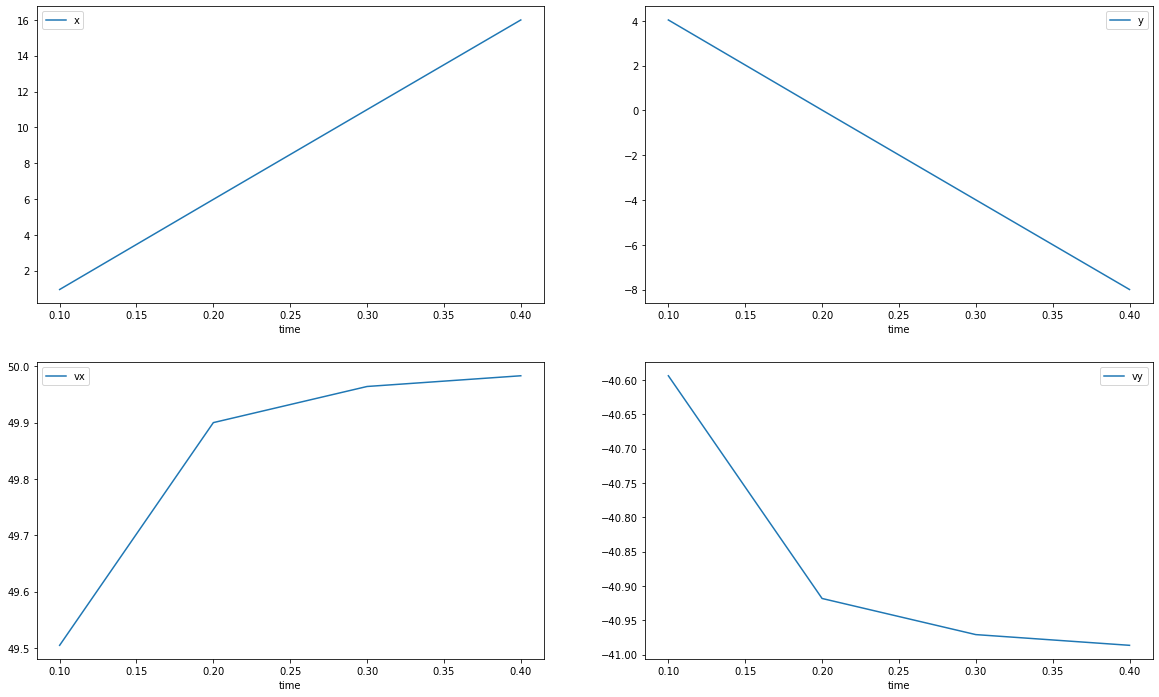

In [58]:
# YOUR CODE HERE
plot_x_log(x_log)

Visualize the components of the $ K $ matrix below

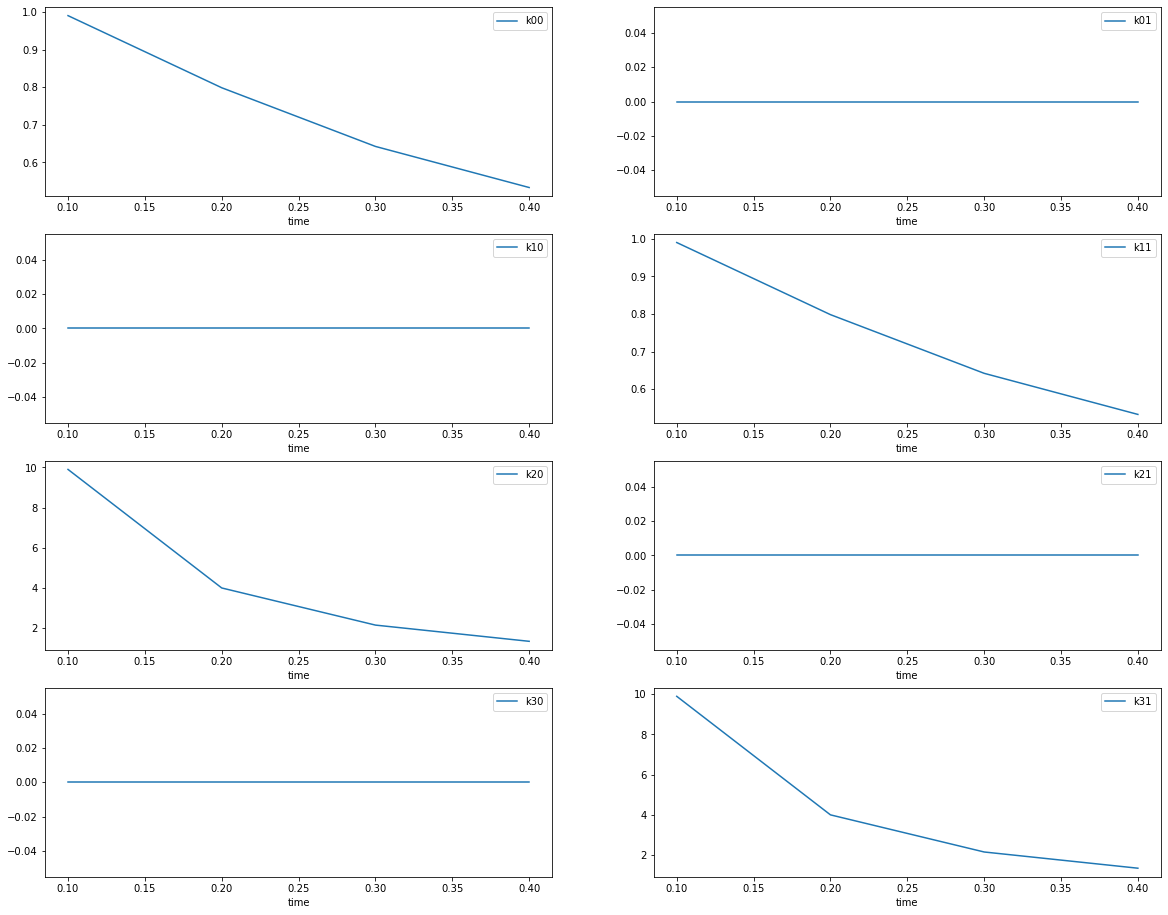

In [59]:
# YOUR CODE HERE
plot_k_log(k_log)

## Third Experiment

In [60]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [61]:
k_log, x_log = kalman_filter(x, E)

x= 
[[  1.        ]
 [ 17.02079208]
 [  0.        ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  1.        ]
 [ 15.00838323]
 [  0.        ]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  1.        ]
 [ 13.00449679]
 [  0.        ]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  1.        ]
 [ 11.00279907]
 [  0.        ]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

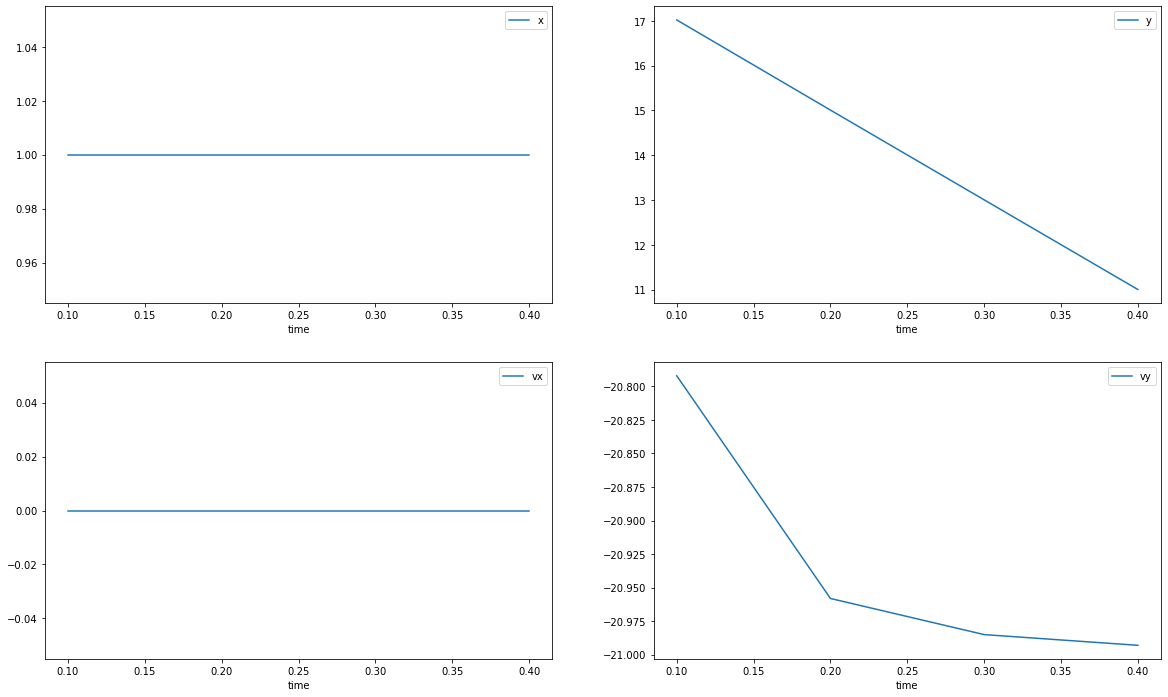

In [62]:
# YOUR CODE HERE
plot_x_log(x_log)

Visualize the components of the $ K $ matrix below

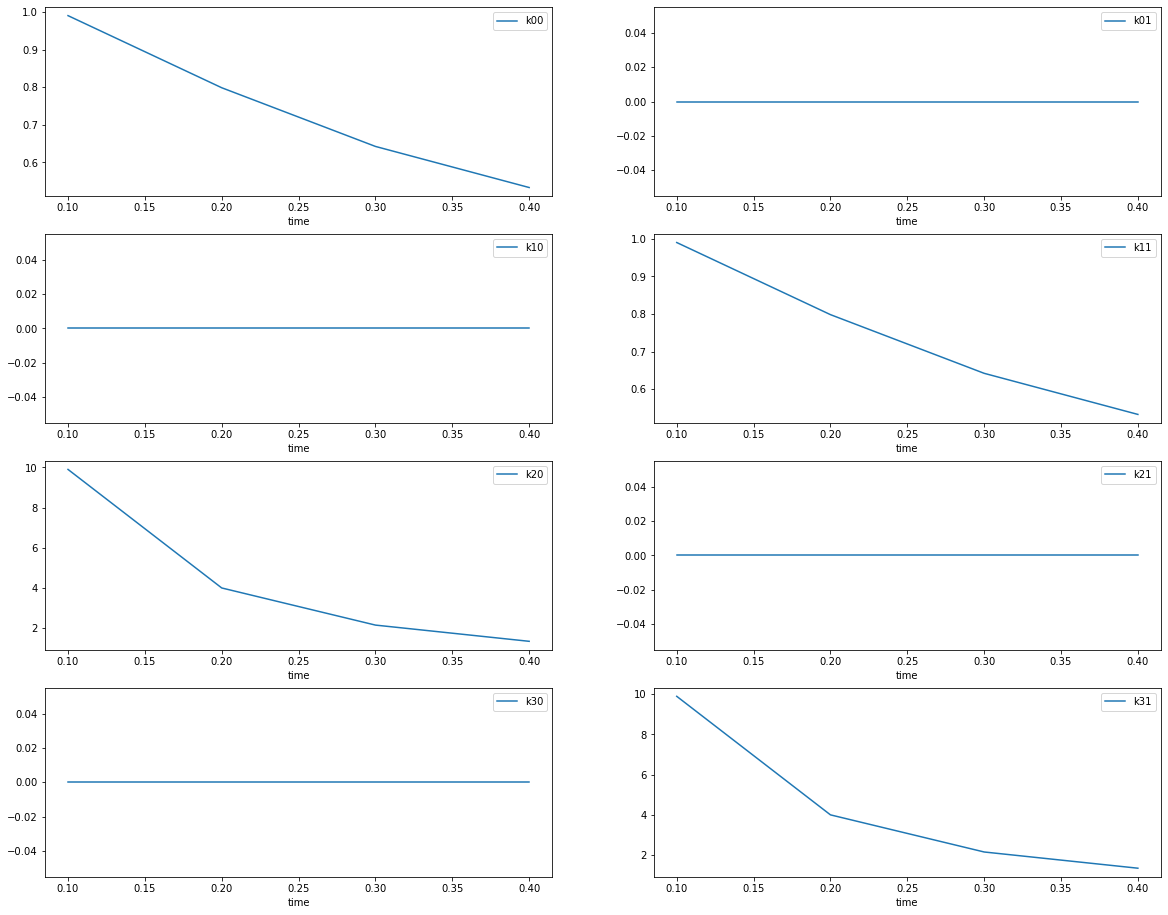

In [63]:
# YOUR CODE HERE
plot_k_log(k_log)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

1) Матрица $К$ характеризует насколько мы уверены в наших предсказаниях:  
чем меньше коэффициенты матрицы, тем меньше мы полагаемся на измерения.  
$x_t = \hat{x} + K'(z_t - H_t\hat{x}_t)$

С каждым шагом байесовской оптимизации, мы все больше уверены в нашей модели предсказаний.

Некоторые коэффициенты матрицы $К$ равны нулю тк например координата x не зависит от измерений y, поэтому $k_{01} = 0$

2) Чтобы посмотреть как уменьшается неопределенность скорости, можно посмотреть на матирцу ковариаций $E$  
Например, в первом эксперименте дисперсия соответсвующих компонентов уменьшилась ~10000 раз.  
Видно, что оценка скорости всего за несколько итераций приходит к стабильному значению.
Это выглядит логичным для такой простой детерминированной среды (без матрицы $Q$) и не очень зашумленных измерений (дисперсия в матрице $R$ = 0.1)